In [1]:
import matplotlib.pylab as plt
import pandas as pd
import sys
import numpy as np
import sklearn
import scipy
import matplotlib
data_root = "https://raw.githubusercontent.com/mattressdog/data/refs/heads/main/"

In [2]:
df = pd.read_csv(data_root + "Breast_Cancer_Primary.csv",
                 dtype={"Race": "string",
                        "Marital Status": "string",
                        "T Stage": "string",
                        "N Stage": "string",
                        "6th Stage": "string",
                        "differentiate": "string",
                        #"Grade": "int64",
                        "A Stage": "string",
                        #"ride_id": "string",
                        "Status": "string",})
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [3]:
df_tumor = pd.read_csv(data_root + "breast-cancer_tumor.csv")

In [4]:
df_test = pd.read_csv(data_root + "Breast_cancer_prediction_data.csv")

In [5]:
df.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


In [6]:
df.info()
df.columns = df.columns.str.strip()
#Will need to convert many column dtypes before proceeding

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   string
 2   Marital Status          4024 non-null   string
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   string
 5   6th Stage               4024 non-null   string
 6   differentiate           4024 non-null   string
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   string
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [7]:
#Counts number of missing observations
#There appear to be none for this dataset
df.isna().sum()

,0
Age,0
Race,0
Marital Status,0
T Stage,0
N Stage,0
6th Stage,0
differentiate,0
Grade,0
A Stage,0
Tumor Size,0


In [8]:
#TODO: What is this telling me?
df.nunique()

,0
Age,40
Race,3
Marital Status,5
T Stage,4
N Stage,3
6th Stage,5
differentiate,4
Grade,4
A Stage,2
Tumor Size,110


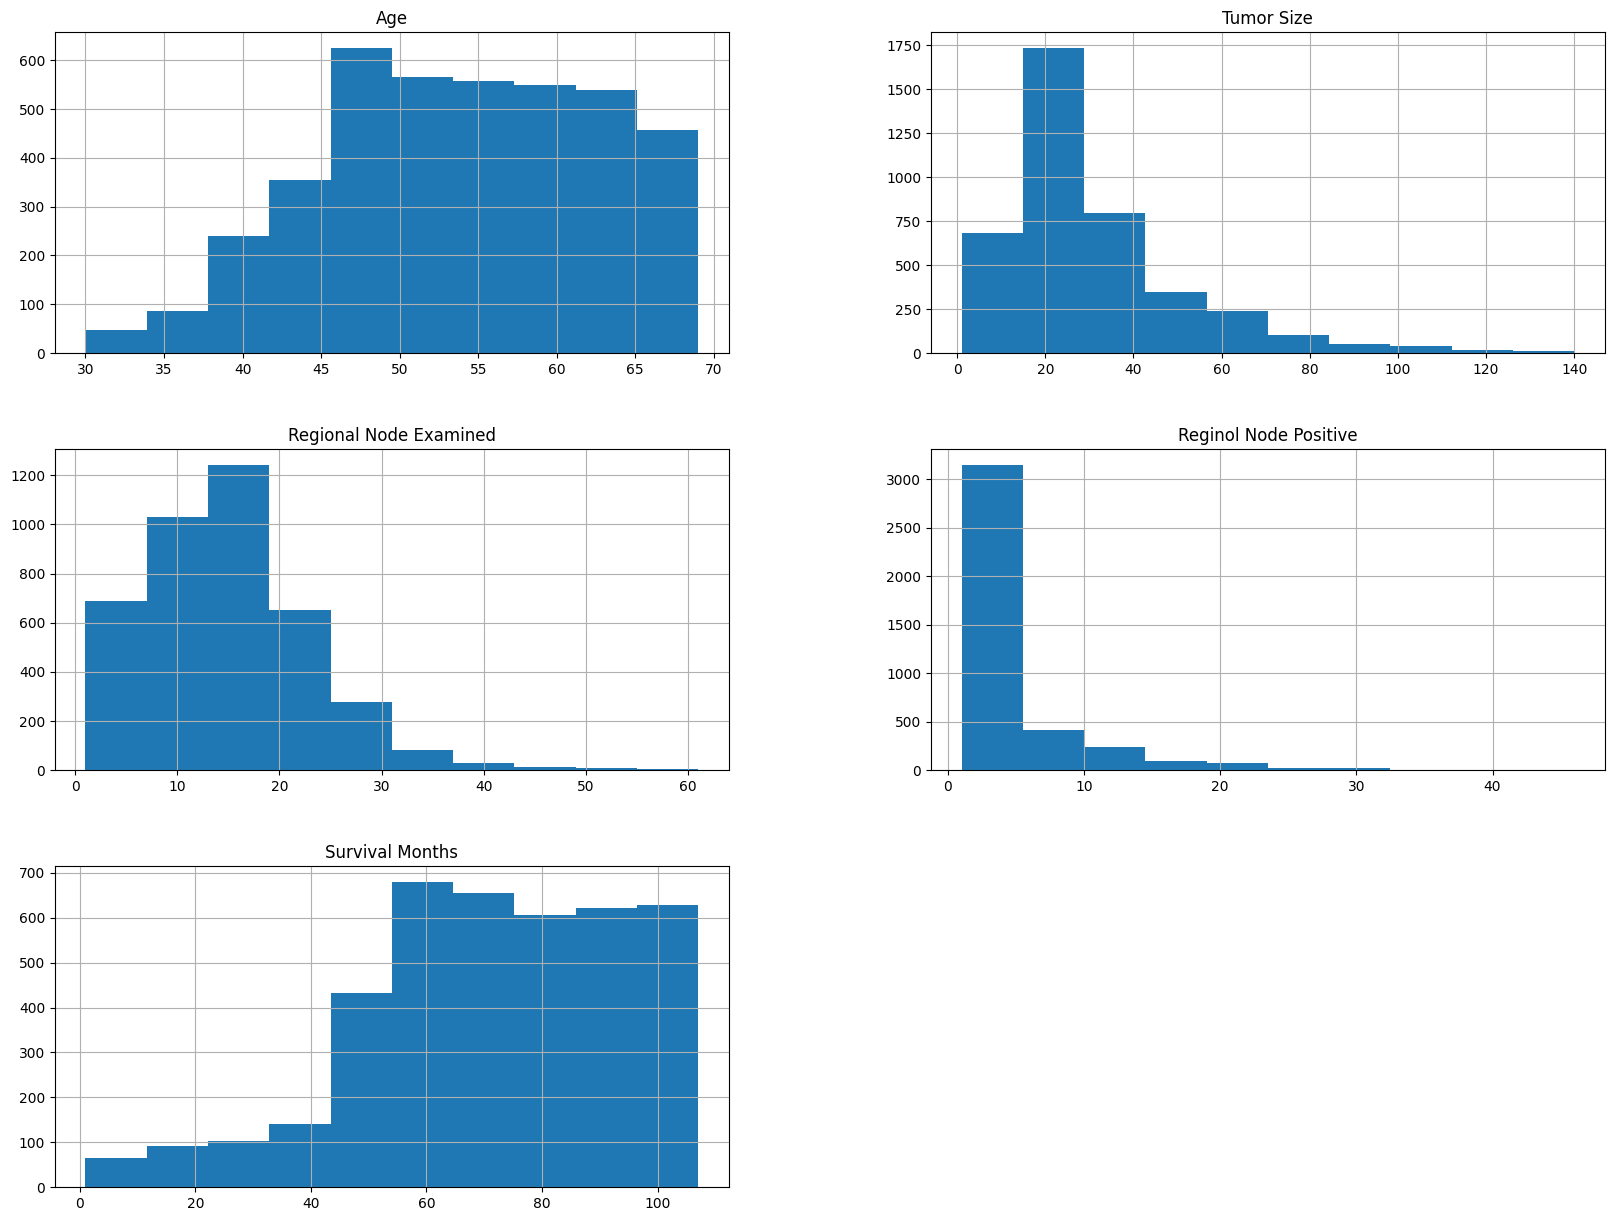

In [9]:
df.hist(figsize=(20,15))
plt.show()

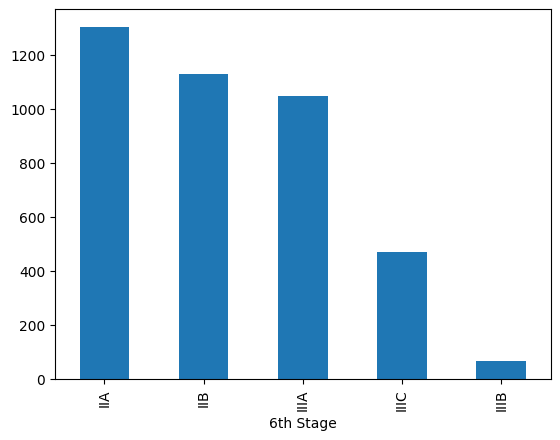

In [10]:
df['6th Stage'].value_counts().plot(kind='bar')
plt.show()

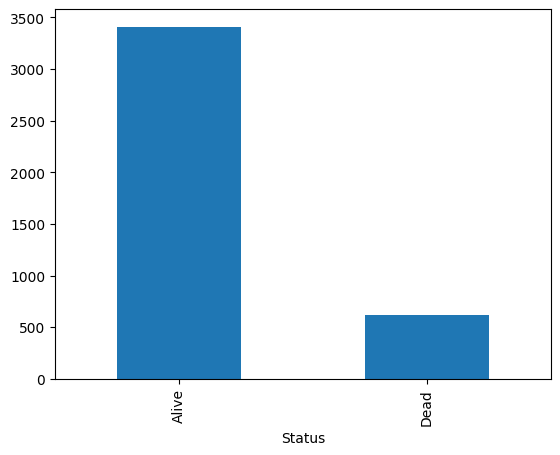

In [11]:
df['Status'].value_counts().plot(kind='bar')
plt.show()

In [12]:
#alive_df = rides[(rides["member_casual"] == "member") & (rides["rideable_type"] == "electric_bike")]
alive_df = df[(df["Status"] == "Alive")]
alive_df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [13]:
dead_df = df[(df["Status"] == "Dead")]
dead_df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
7,40,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,30,Positive,Positive,9,1,14,Dead
10,68,White,Widowed,T1,N1,IIA,Moderately differentiated,2,Regional,13,Positive,Positive,9,1,64,Dead
40,57,White,Single,T3,N3,IIIC,Moderately differentiated,2,Regional,70,Positive,Positive,12,12,42,Dead
46,42,White,Married,T1,N3,IIIC,Moderately differentiated,2,Regional,9,Negative,Negative,15,2,39,Dead
64,67,White,Divorced,T1,N1,IIA,Moderately differentiated,2,Regional,13,Positive,Positive,16,3,60,Dead


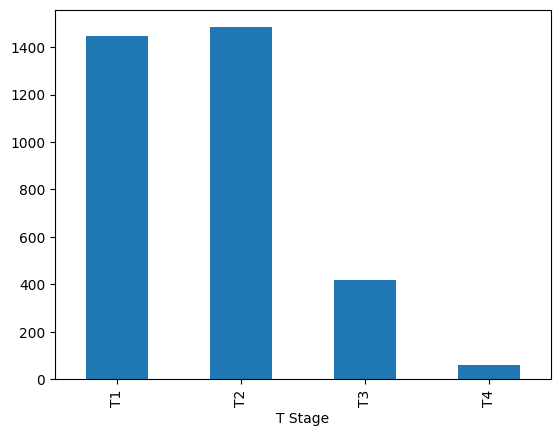

In [14]:
alive_df['T Stage'].value_counts().sort_index().plot(kind='bar')
#dead_df['T Stage'].value_counts().sort_index().plot(kind='bar')
#plt.tight_layout()
plt.show()

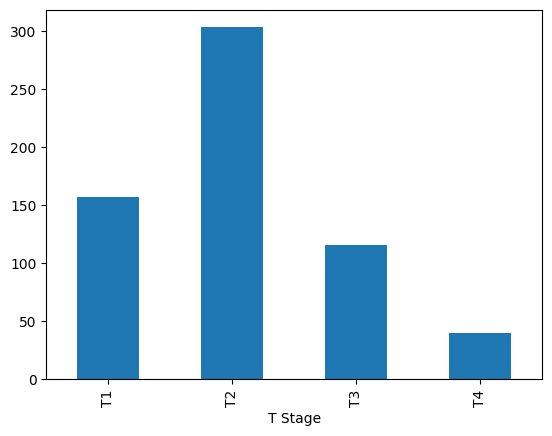

In [15]:
#The following plot is to compare survival status with the initial diagnosis characteristics

#TODO: Figure this out

#fig, axes = plt.subplots(1, 2, figsize=(10,4))
#alive_df['T Stage'].value_counts().sort_index().plot(kind='bar')
dead_df['T Stage'].value_counts().sort_index().plot(kind='bar')
#plt.tight_layout()
plt.show()

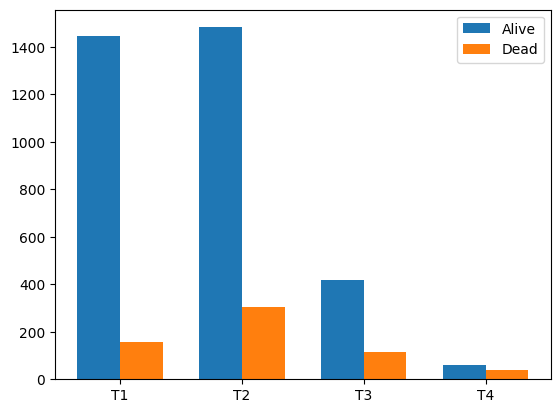

In [16]:
#Same Axis?
#AI Generated code so change a few things.
counts1 = alive_df['T Stage'].value_counts().sort_index()
counts2 = dead_df['T Stage'].value_counts().sort_index()

categories = counts1.index
x = np.arange(len(categories))           # [0, 1, 2, ...]
width = 0.35                              # bar width

plt.bar(x - width/2, counts1.values, width, label='Alive')
plt.bar(x + width/2, counts2.values, width, label='Dead')

plt.xticks(x, categories)
plt.legend()
plt.show()

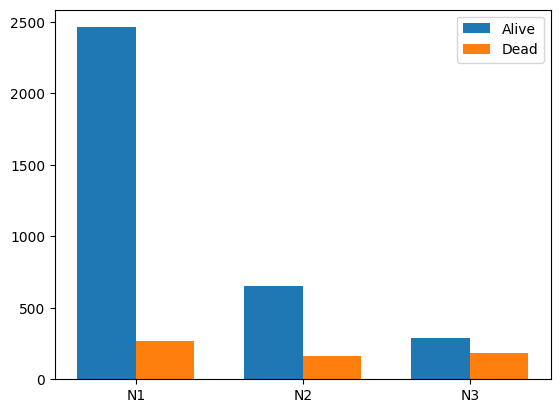

In [17]:
counts1 = alive_df['N Stage'].value_counts().sort_index()
counts2 = dead_df['N Stage'].value_counts().sort_index()

categories = counts1.index
x = np.arange(len(categories))           # [0, 1, 2, ...]
width = 0.35                              # bar width

plt.bar(x - width/2, counts1.values, width, label='Alive')
plt.bar(x + width/2, counts2.values, width, label='Dead')

plt.xticks(x, categories)
plt.legend()
plt.show()

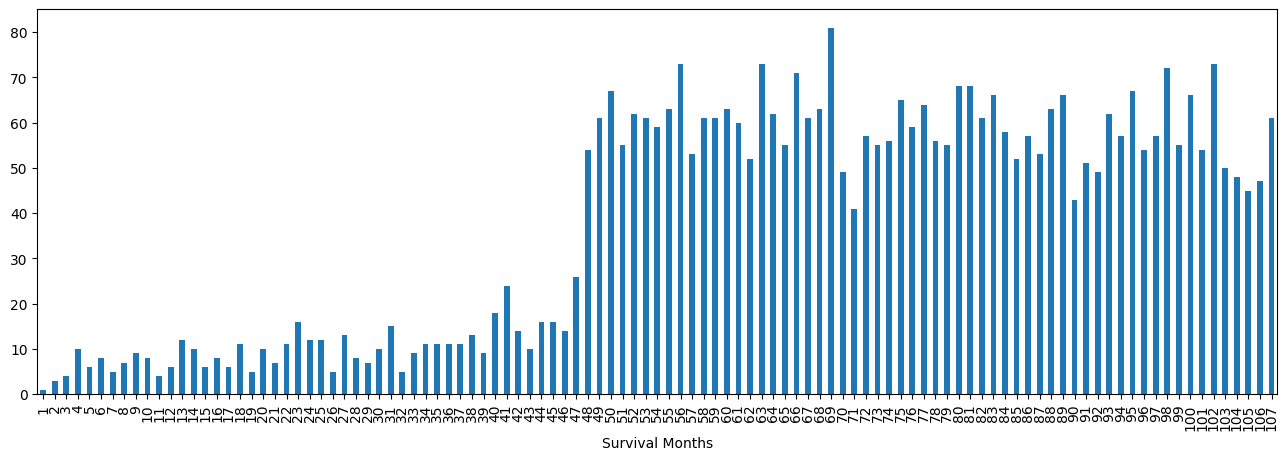

In [18]:
#Months Survived
#Needed for a wider graph.
#Recall: 107 unique entries
plt.figure(figsize=(16, 5))
df['Survival Months'].value_counts().sort_index().plot(kind='bar')
plt.show()

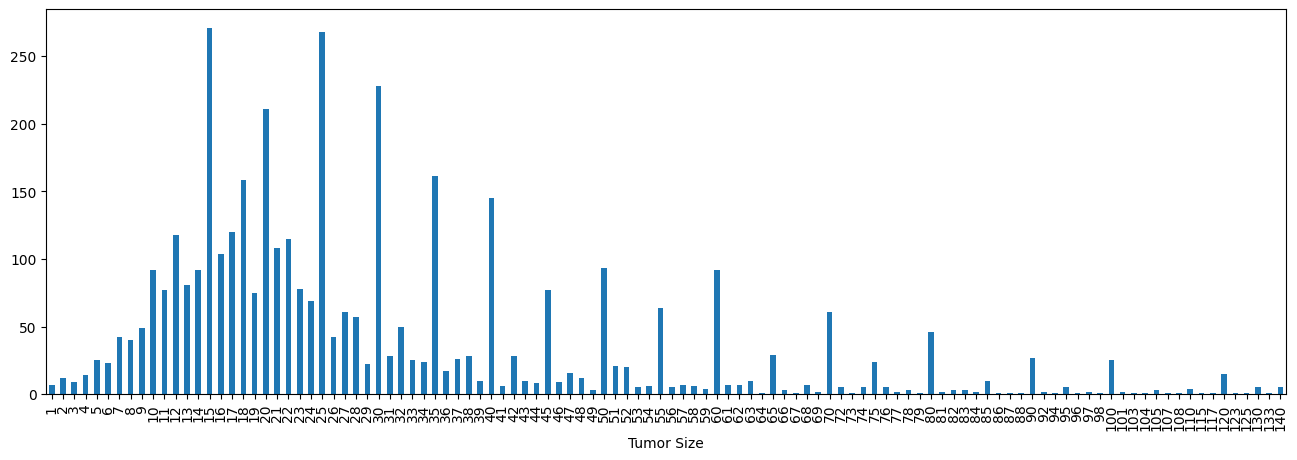

In [19]:
plt.figure(figsize=(16, 5))
df['Tumor Size'].value_counts().sort_index().plot(kind='bar')
plt.show()

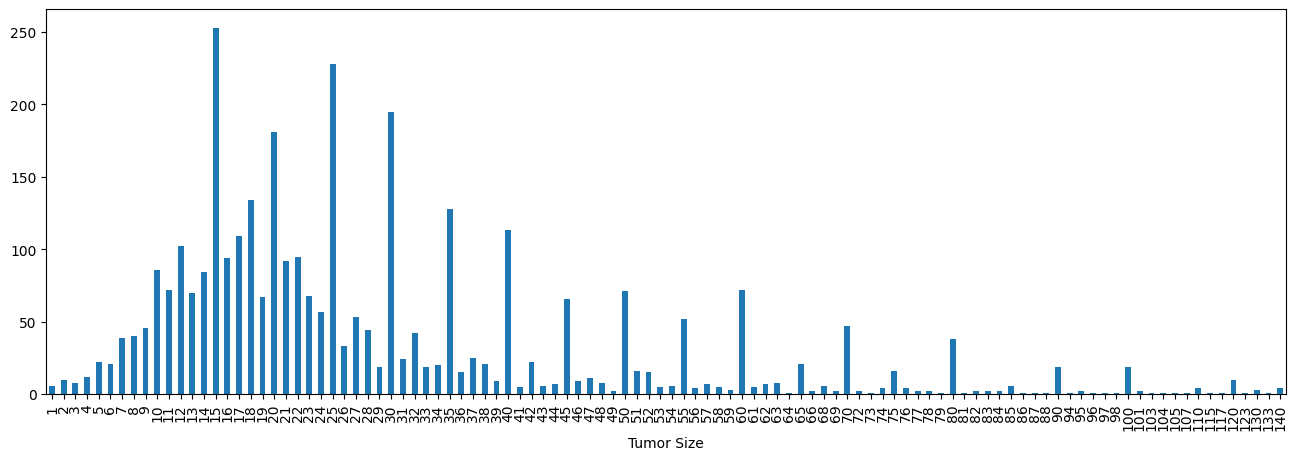

In [20]:
plt.figure(figsize=(16, 5))
alive_df['Tumor Size'].value_counts().sort_index().plot(kind='bar')
plt.show()

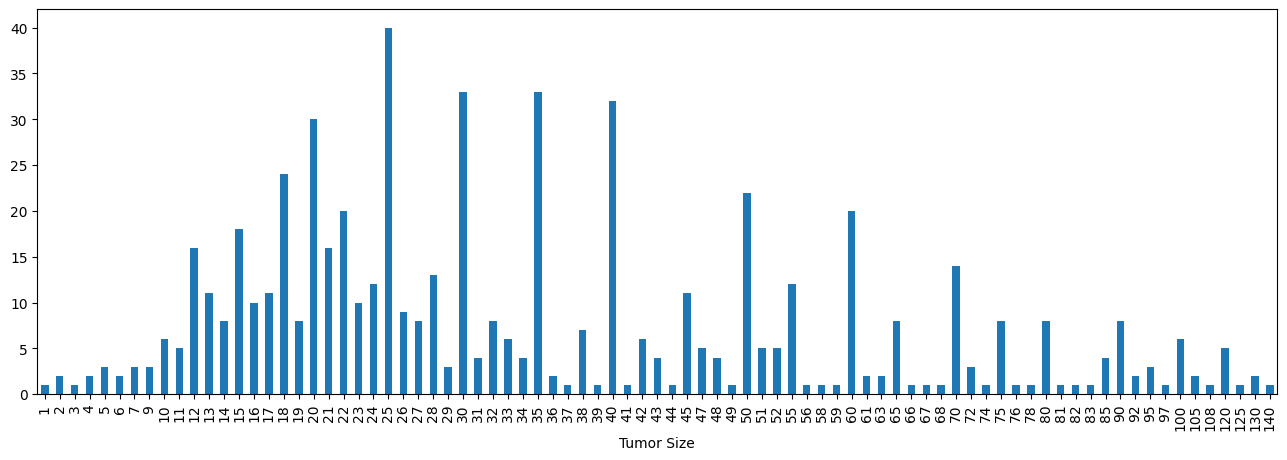

In [21]:
plt.figure(figsize=(16, 5))
dead_df['Tumor Size'].value_counts().sort_index().plot(kind='bar')
plt.show()

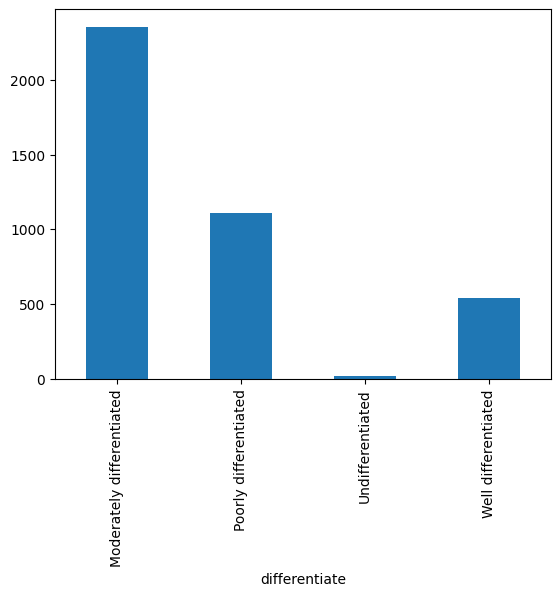

In [22]:
#might be good as a 3 way bar chart

df['differentiate'].value_counts().sort_index().plot(kind='bar')
plt.show()

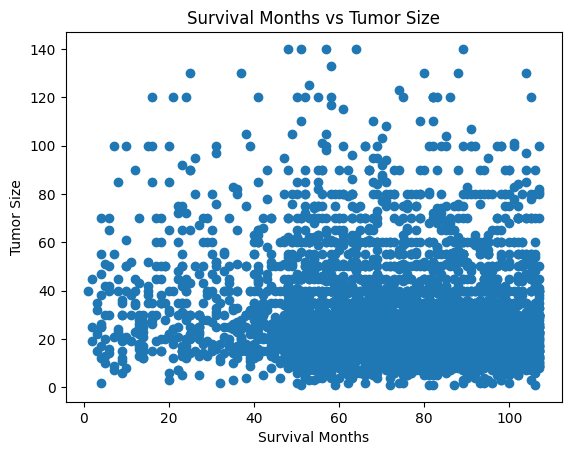

In [23]:
plt.scatter(df['Survival Months'], df['Tumor Size'])
plt.xlabel('Survival Months')
plt.ylabel('Tumor Size')
plt.title('Survival Months vs Tumor Size')
plt.show()

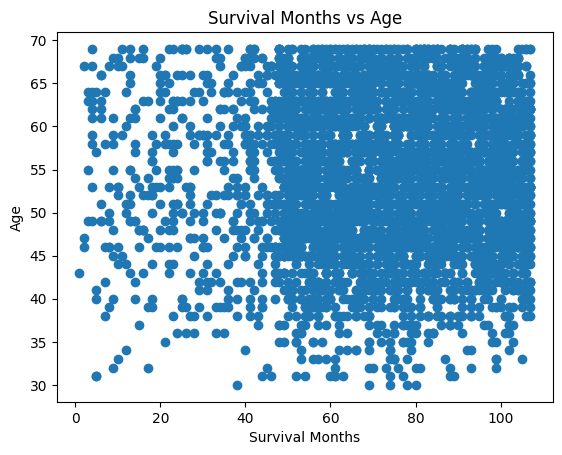

In [24]:
plt.scatter(df['Survival Months'], df['Age'])
plt.xlabel('Survival Months')
plt.ylabel('Age')
plt.title('Survival Months vs Age')
plt.show()

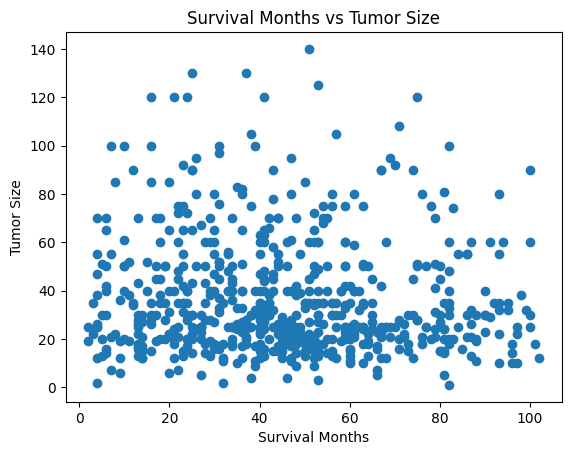

In [25]:
plt.scatter(dead_df['Survival Months'], dead_df['Tumor Size'])
plt.xlabel('Survival Months')
plt.ylabel('Tumor Size')
plt.title('Survival Months vs Tumor Size')
plt.show()

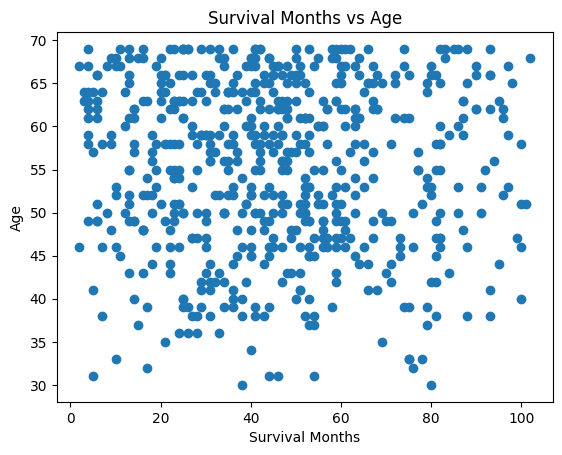

In [26]:
plt.scatter(dead_df['Survival Months'], dead_df['Age'])
plt.xlabel('Survival Months')
plt.ylabel('Age')
plt.title('Survival Months vs Age')
plt.show()

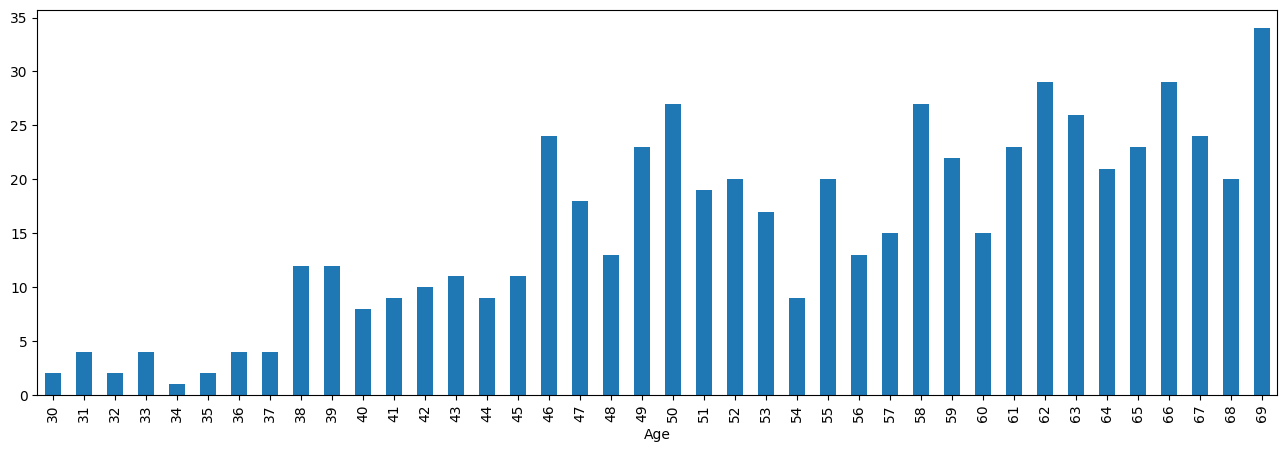

In [27]:
plt.figure(figsize=(16, 5))
dead_df['Age'].value_counts().sort_index().plot(kind='bar')
plt.show()

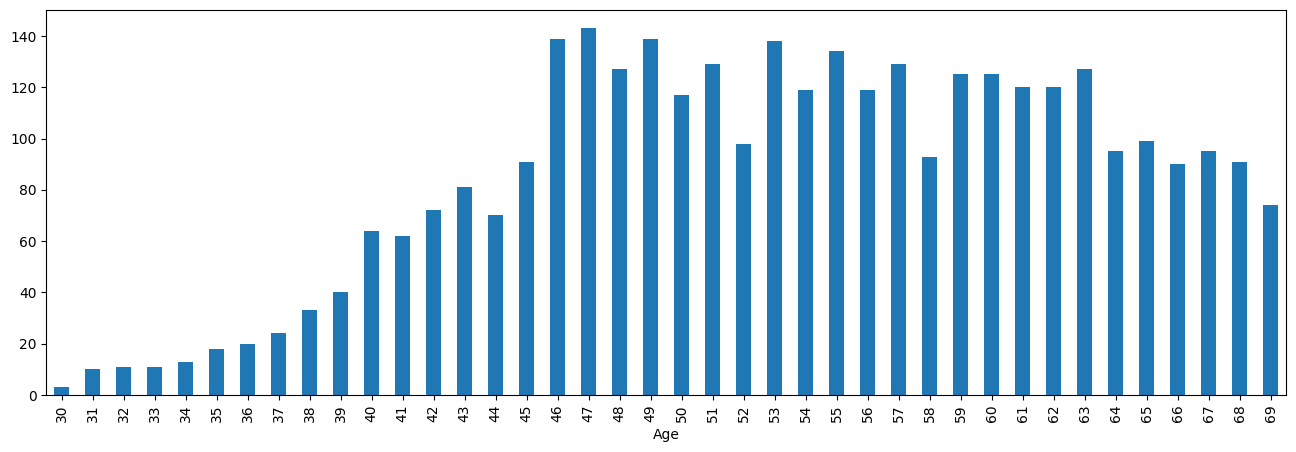

In [28]:
plt.figure(figsize=(16, 5))
alive_df['Age'].value_counts().sort_index().plot(kind='bar')
plt.show()

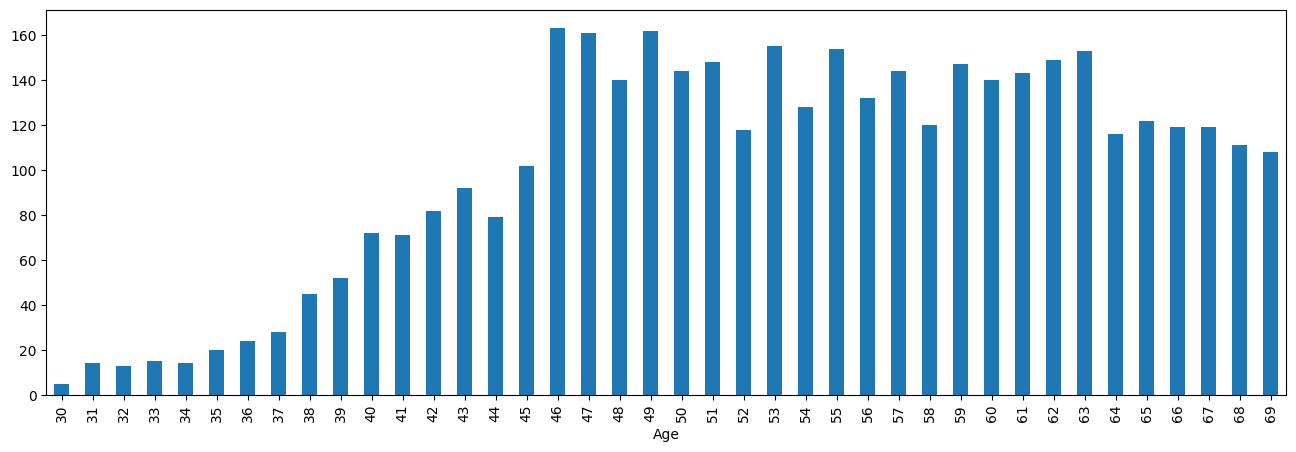

In [29]:
plt.figure(figsize=(16, 5))
df['Age'].value_counts().sort_index().plot(kind='bar')
plt.show()

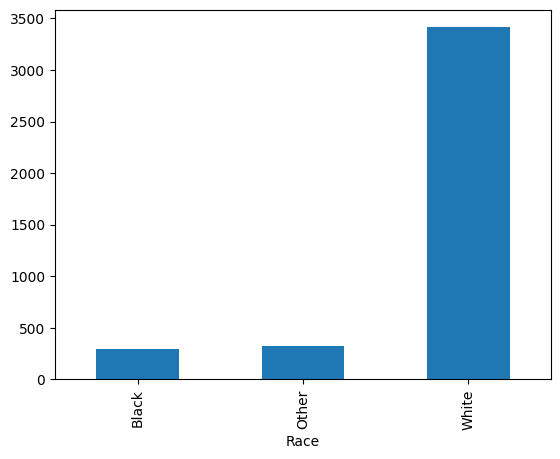

In [30]:
#plt.figure(figsize=(16, 5))
df['Race'].value_counts().sort_index().plot(kind='bar')
plt.show()

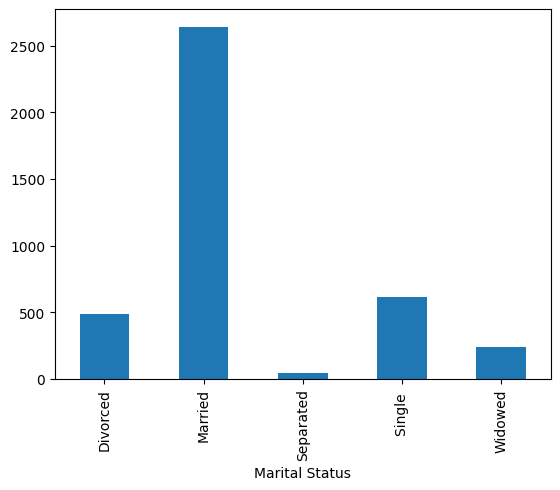

In [31]:
#plt.figure(figsize=(16, 5))
df['Marital Status'].value_counts().sort_index().plot(kind='bar')
plt.show()

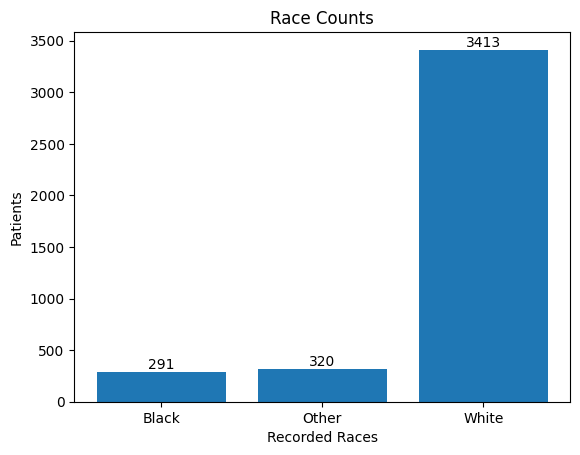

In [32]:
values = df['Race'].value_counts().sort_index()

#plt.figure(figsize=(5,5))
bars = plt.bar(values.index, values.values)

plt.title("Race Counts")
plt.xlabel("Recorded Races")
plt.ylabel("Patients")

# Add numbers above bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height,
        str(height),
        ha='center',
        va='bottom'
    )

plt.show()

<Axes: xlabel='Race'>

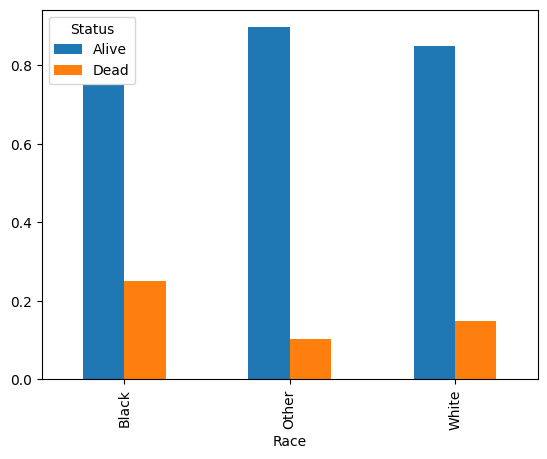

In [37]:
#normalized
race_status = pd.crosstab(df['Race'], df['Status'], normalize='index')
race_status.plot(kind='bar')

<Axes: xlabel='Race'>

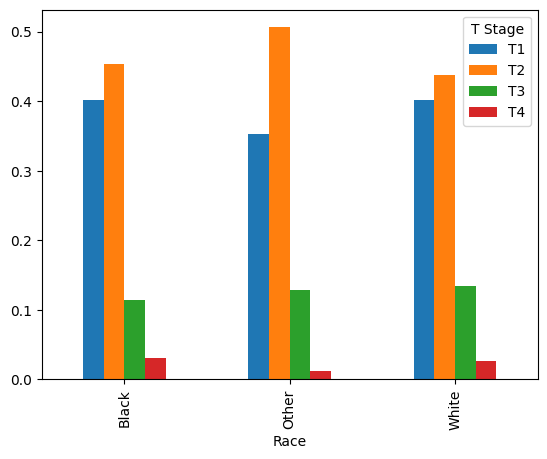

In [39]:
#Normalized
race_t_stage = pd.crosstab(df['Race'], df['T Stage'], normalize='index')
race_t_stage.plot(kind='bar')

<Axes: xlabel='Race'>

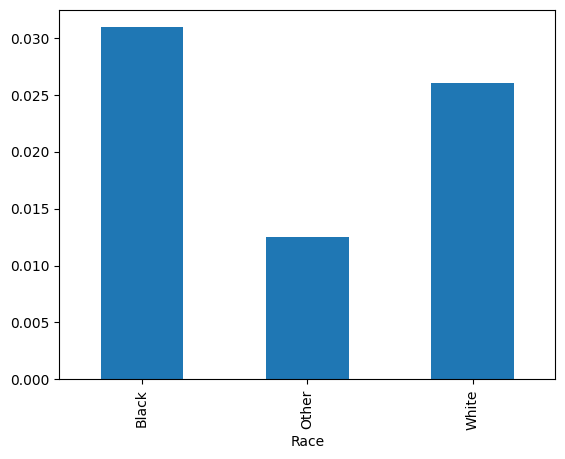

In [43]:
table = pd.crosstab(df['Race'], df['T Stage'], normalize='index')
table['T4'].plot(kind='bar')    # replace 'Yes' with your value

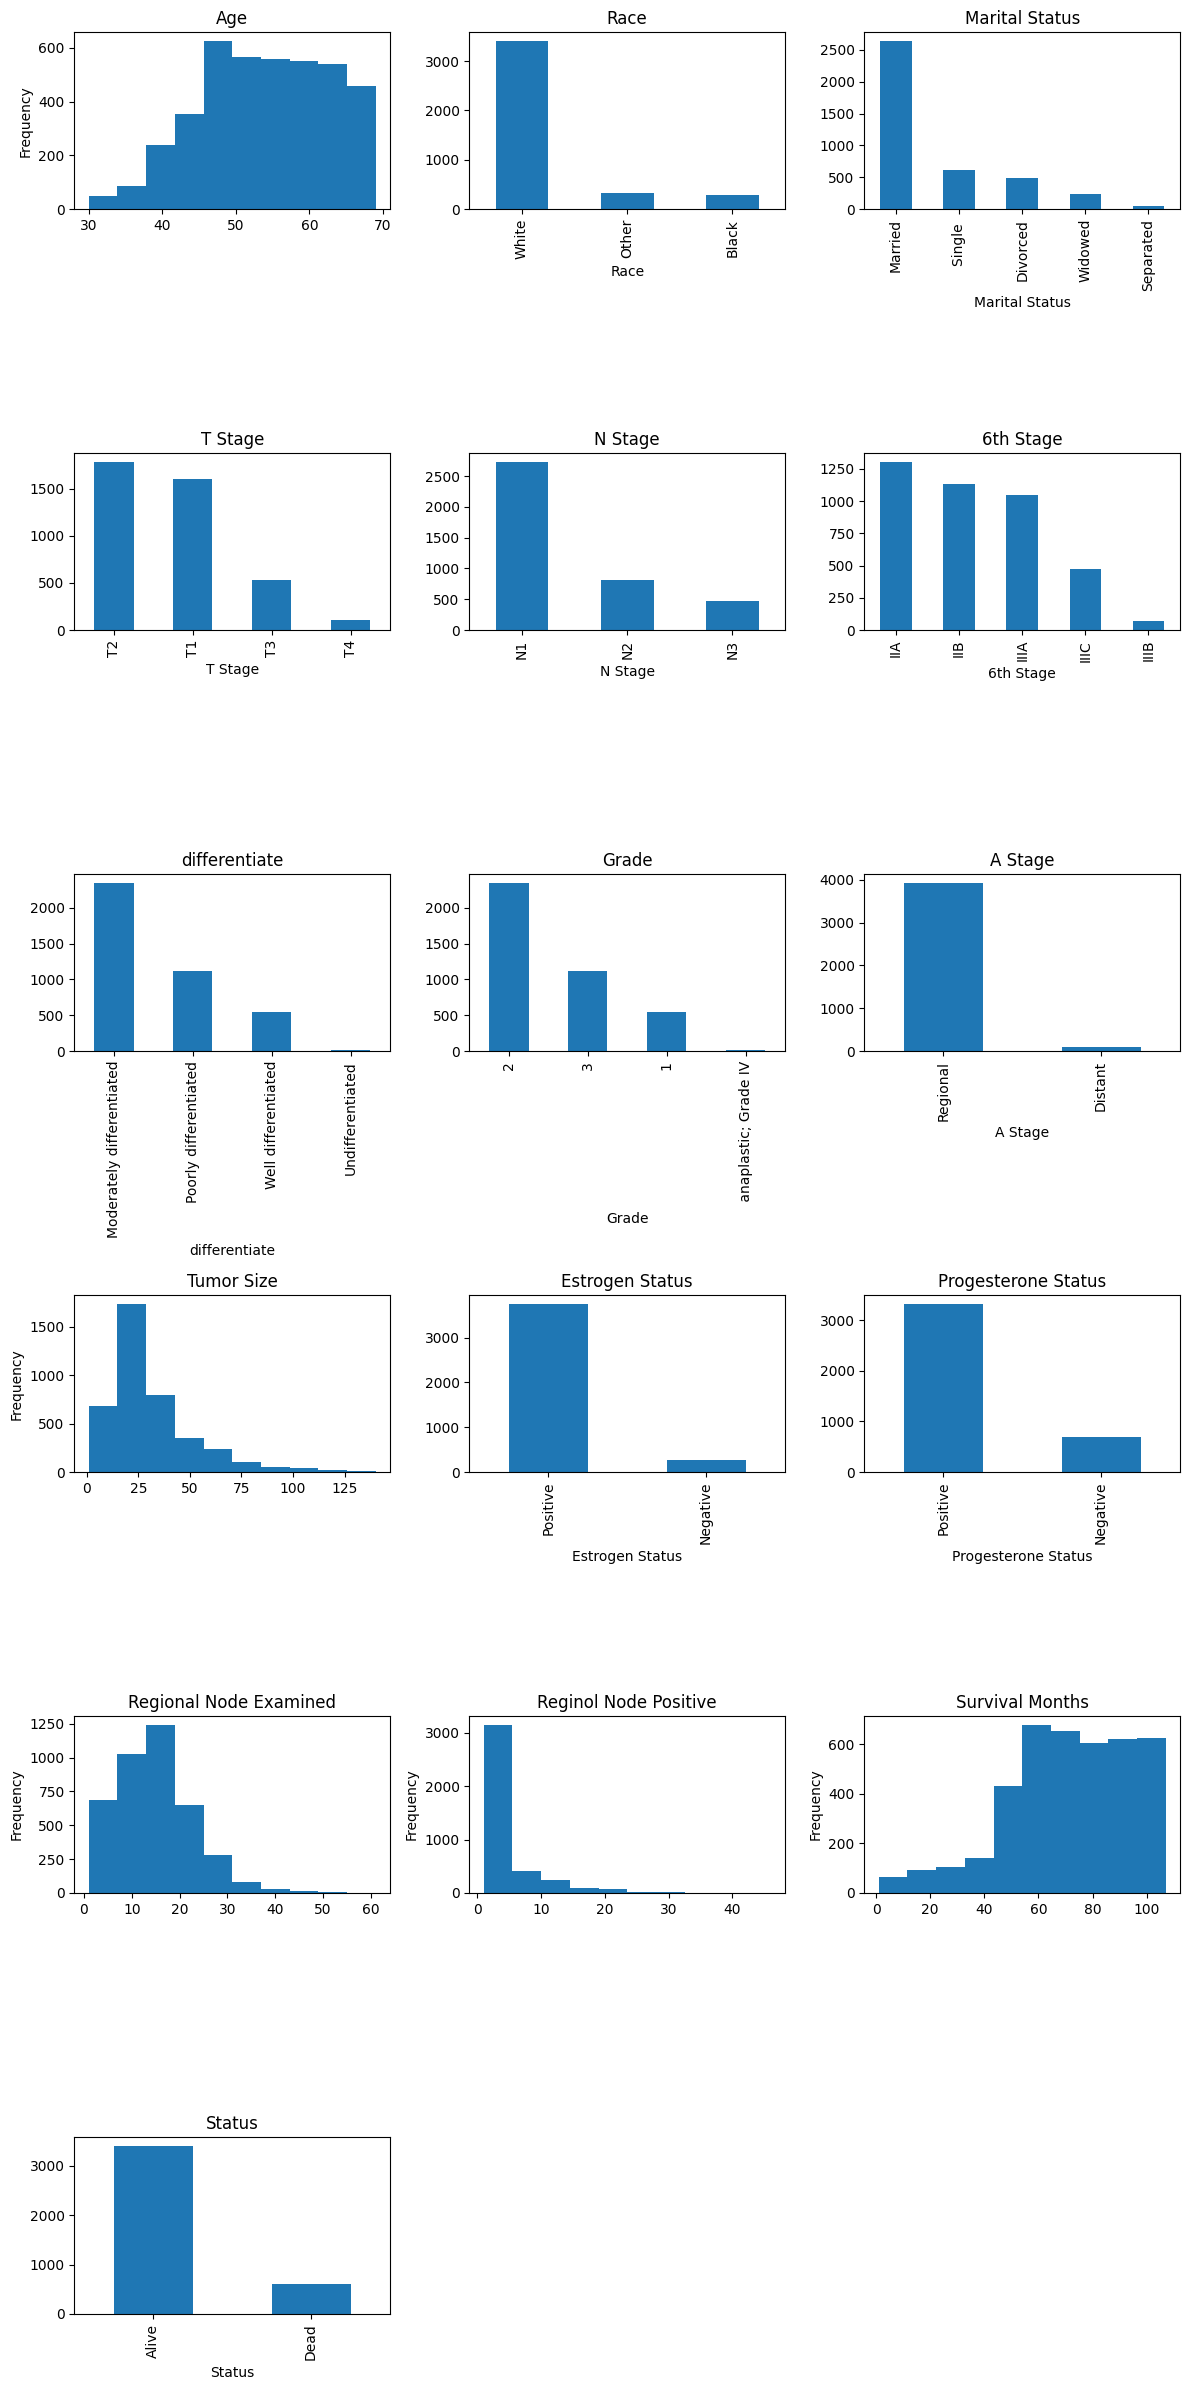

In [45]:
cols = df.columns
n = len(cols)

nrows = int((n + 2) / 3)
if nrows == 0:
    nrows = 1

fig, axes = plt.subplots(
    nrows=nrows,
    ncols=3,
    figsize=(12, 4 * nrows)
)

axes = axes.ravel()

for i, col in enumerate(cols):
    if pd.api.types.is_numeric_dtype(df[col]):
        df[col].plot(kind='hist', ax=axes[i], title=col)
    else:
        df[col].value_counts().plot(kind='bar', ax=axes[i], title=col)

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

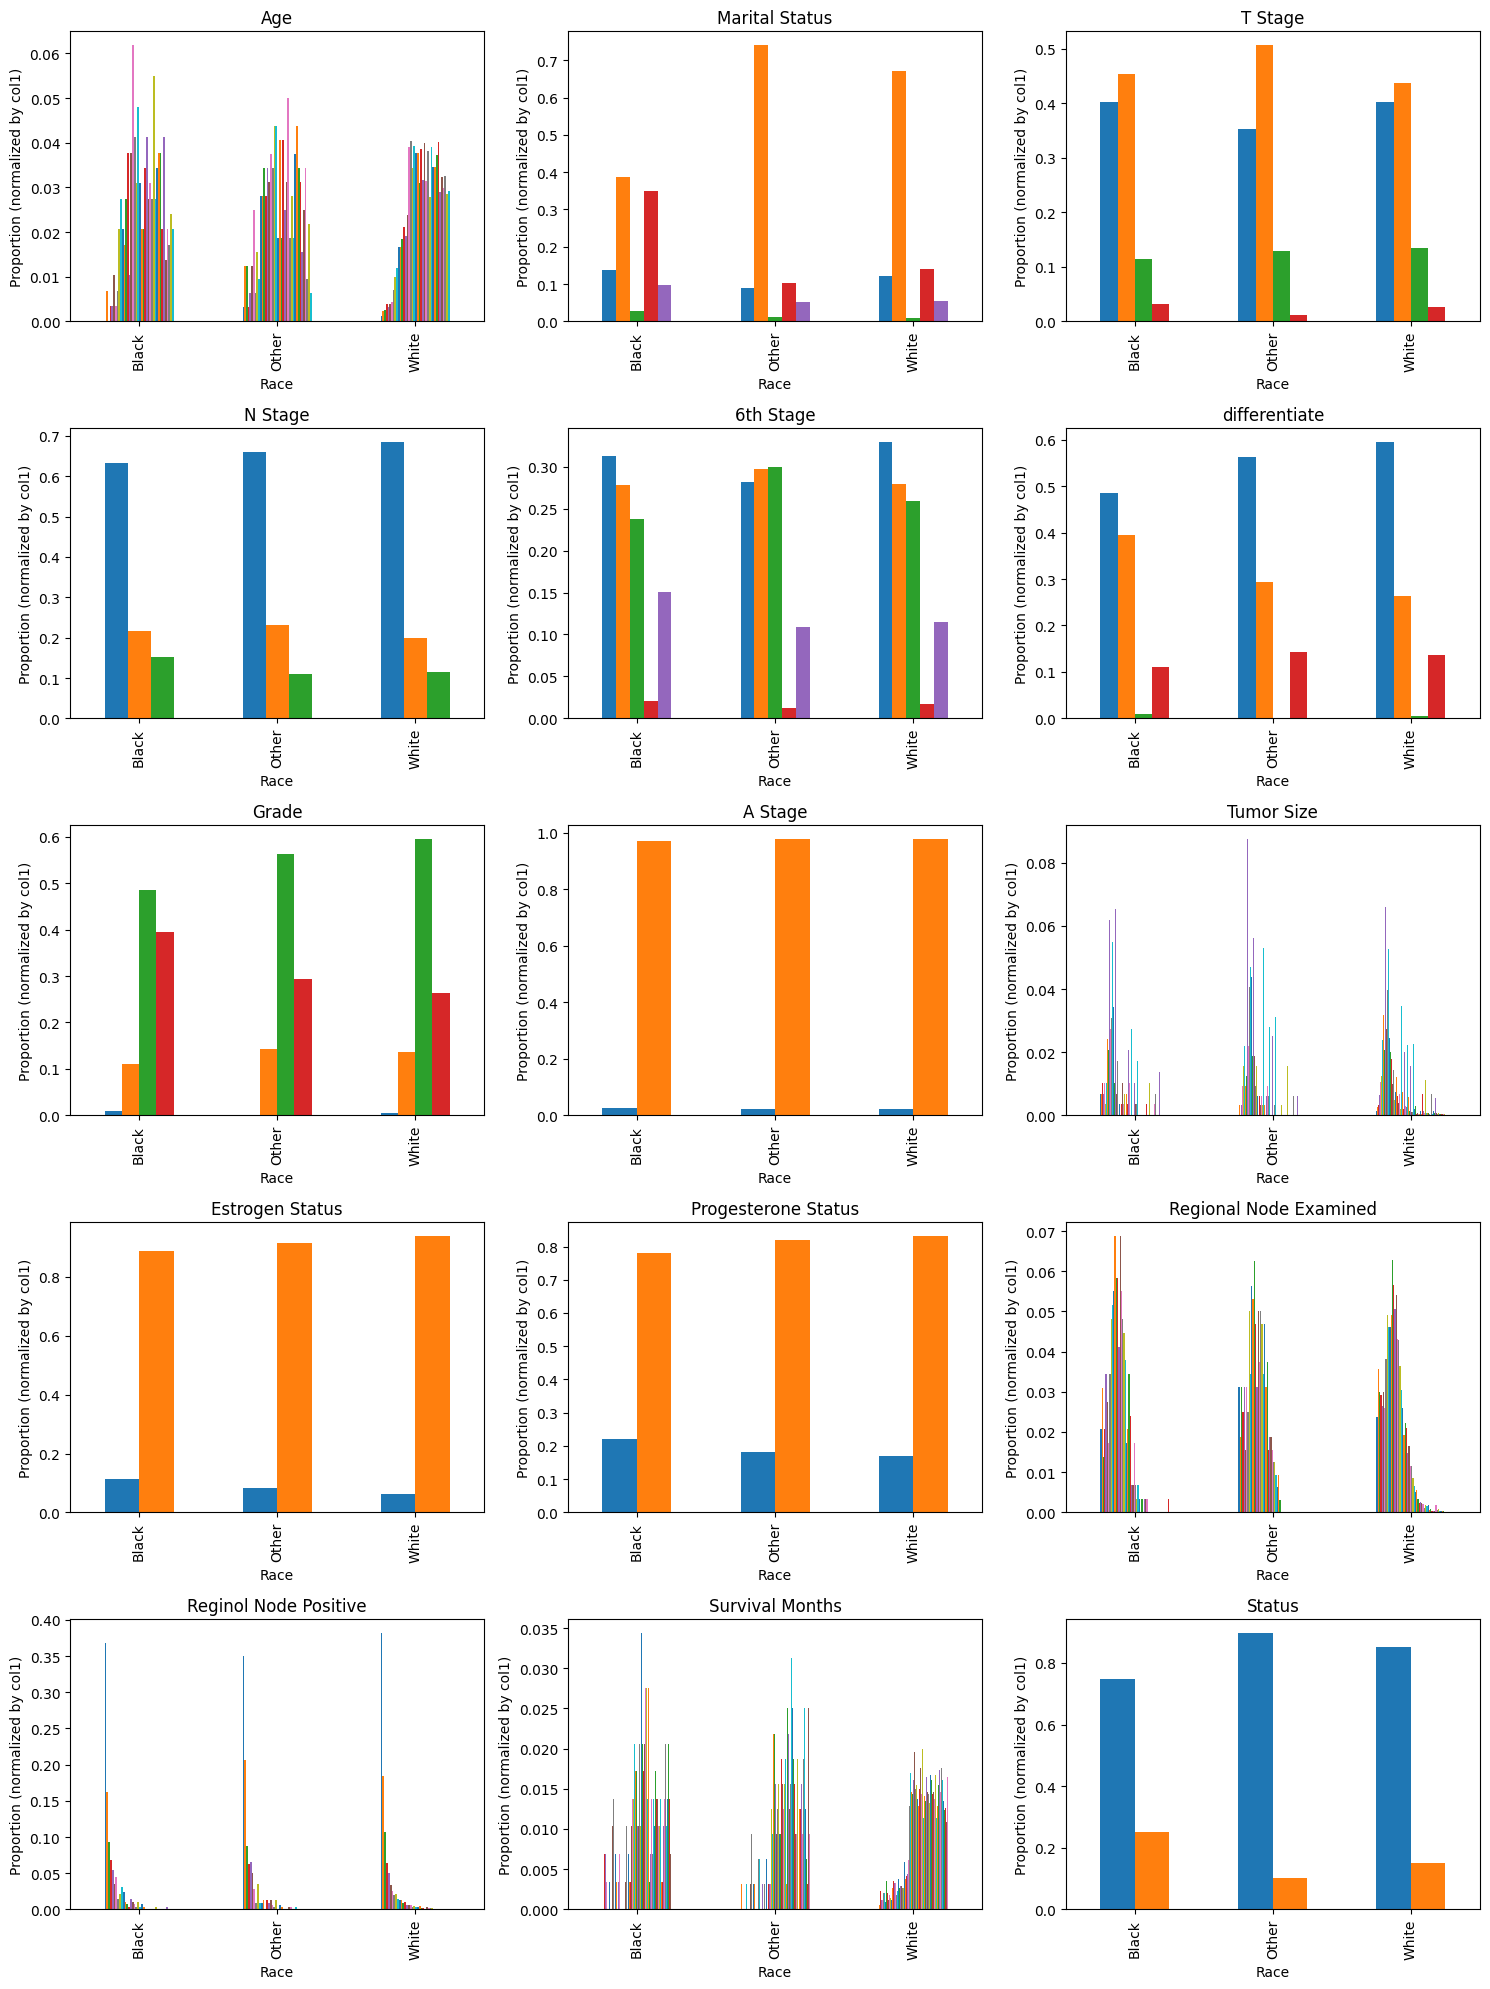

In [48]:
group_col = "Race"

cols = df.columns.drop(group_col)
n = len(cols)

fig, axes = plt.subplots(
    nrows=int((n + 2) / 3),
    ncols=3,
    figsize=(15, 4 * int((n + 2) / 3))
)

axes = axes.ravel()

for i, col in enumerate(cols):
    ax = axes[i]

    # Convert numeric columns to categorical for value_counts()
    if df[col].dtype != 'object' and df[col].dtype.name != 'category':
        temp = df[col].astype(str)
    else:
        temp = df[col]

    # Normalized proportions grouped by col1
    prop = (
        df.groupby(group_col)[col]
          .value_counts(normalize=True)
          .unstack(fill_value=0)
    )

    prop.plot(kind="bar", ax=ax, title=col, legend=False)
    ax.set_ylabel("Proportion (normalized by col1)")

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

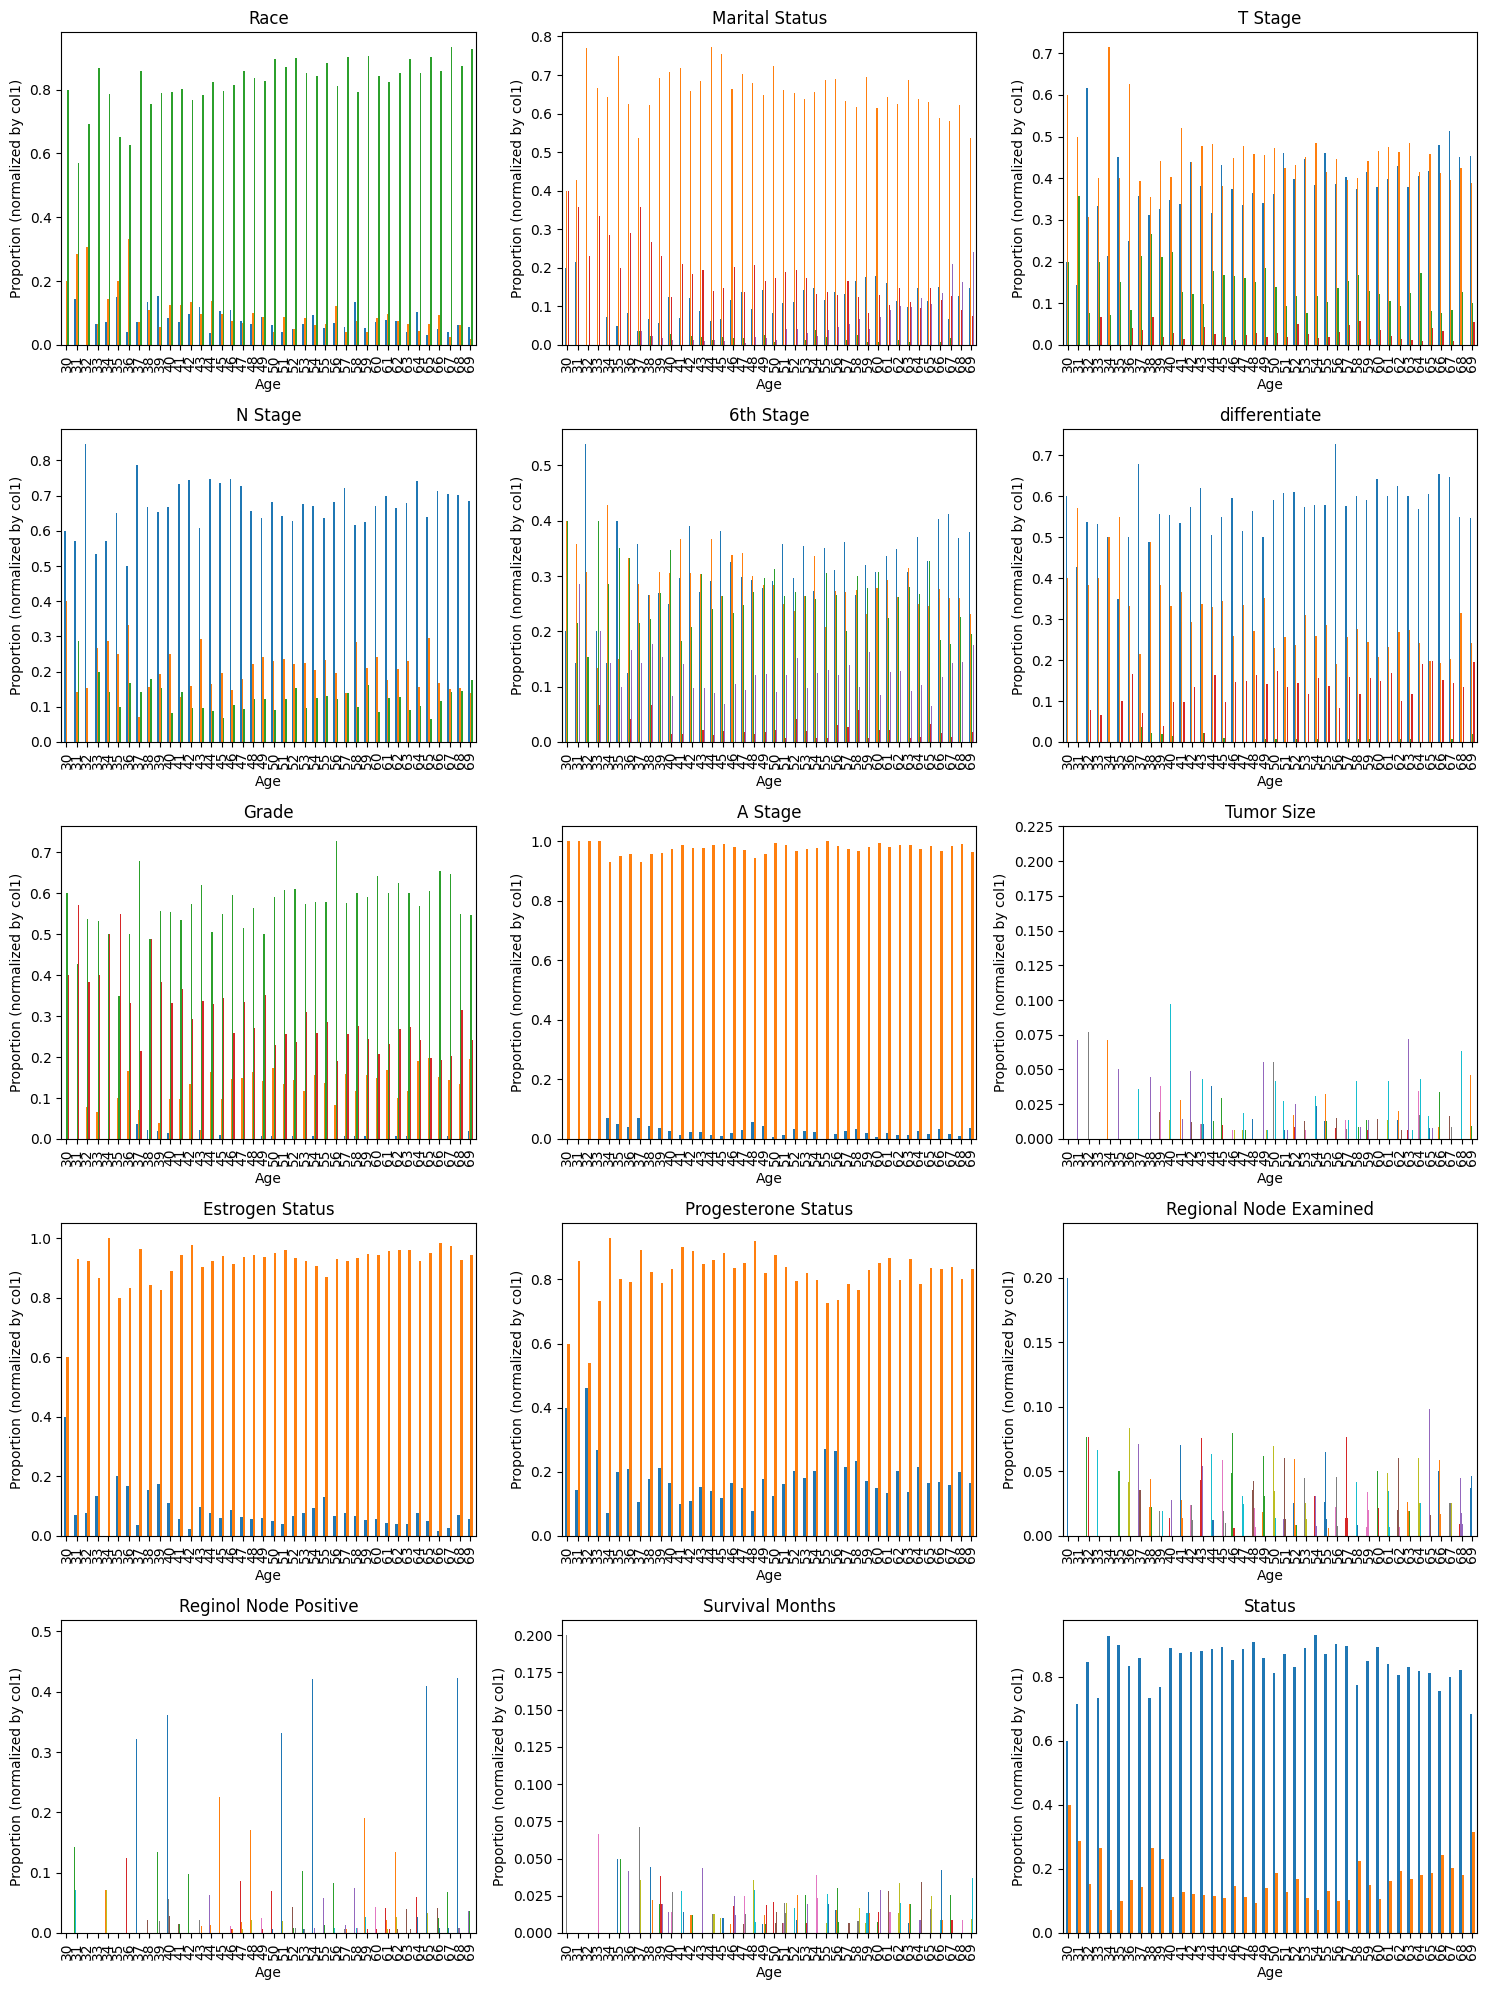

In [49]:
group_col = "Age"

cols = df.columns.drop(group_col)
n = len(cols)

fig, axes = plt.subplots(
    nrows=int((n + 2) / 3),
    ncols=3,
    figsize=(15, 4 * int((n + 2) / 3))
)

axes = axes.ravel()

for i, col in enumerate(cols):
    ax = axes[i]

    # Convert numeric columns to categorical for value_counts()
    if df[col].dtype != 'object' and df[col].dtype.name != 'category':
        temp = df[col].astype(str)
    else:
        temp = df[col]

    # Normalized proportions grouped by col1
    prop = (
        df.groupby(group_col)[col]
          .value_counts(normalize=True)
          .unstack(fill_value=0)
    )

    prop.plot(kind="bar", ax=ax, title=col, legend=False)
    ax.set_ylabel("Proportion (normalized by col1)")

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()